In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pycaret

In [2]:
#Importing the dataset

df = pd.read_csv('../data/02_mushroom_data.csv')

In [3]:
#Using df.info() to check general row count, columns and column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
#using value counts to check class distribution in data

df['class'].value_counts()

class
edible       4208
poisonous    3916
Name: count, dtype: int64

In [5]:
#Checking for the number of unique values in each column

df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      6
dtype: int64

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [7]:
df['ring-number'].value_counts()

ring-number
one     7488
two      600
none      36
Name: count, dtype: int64

From this countplot we can see that the number of poisonous and edible mushrooms in the dataset is about the same. Therefore, the dataset is balanced and no data balancing is required as the potential addition of noise by generating artificial data  could be worse than having a very insignificant difference in calss count.

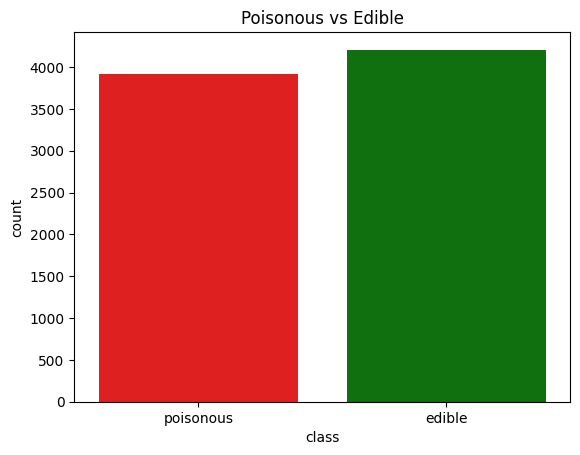

In [57]:
# Plotting a bar chart comparing the 2 classes
colors = {'edible': 'green', 'poisonous': 'red'}
sns.countplot(data=df, x='class',palette=colors)


plt.title('Poisonous vs Edible')

plt.show()

Making subplots for stalk related categories to check class distributions amongst stalk columns

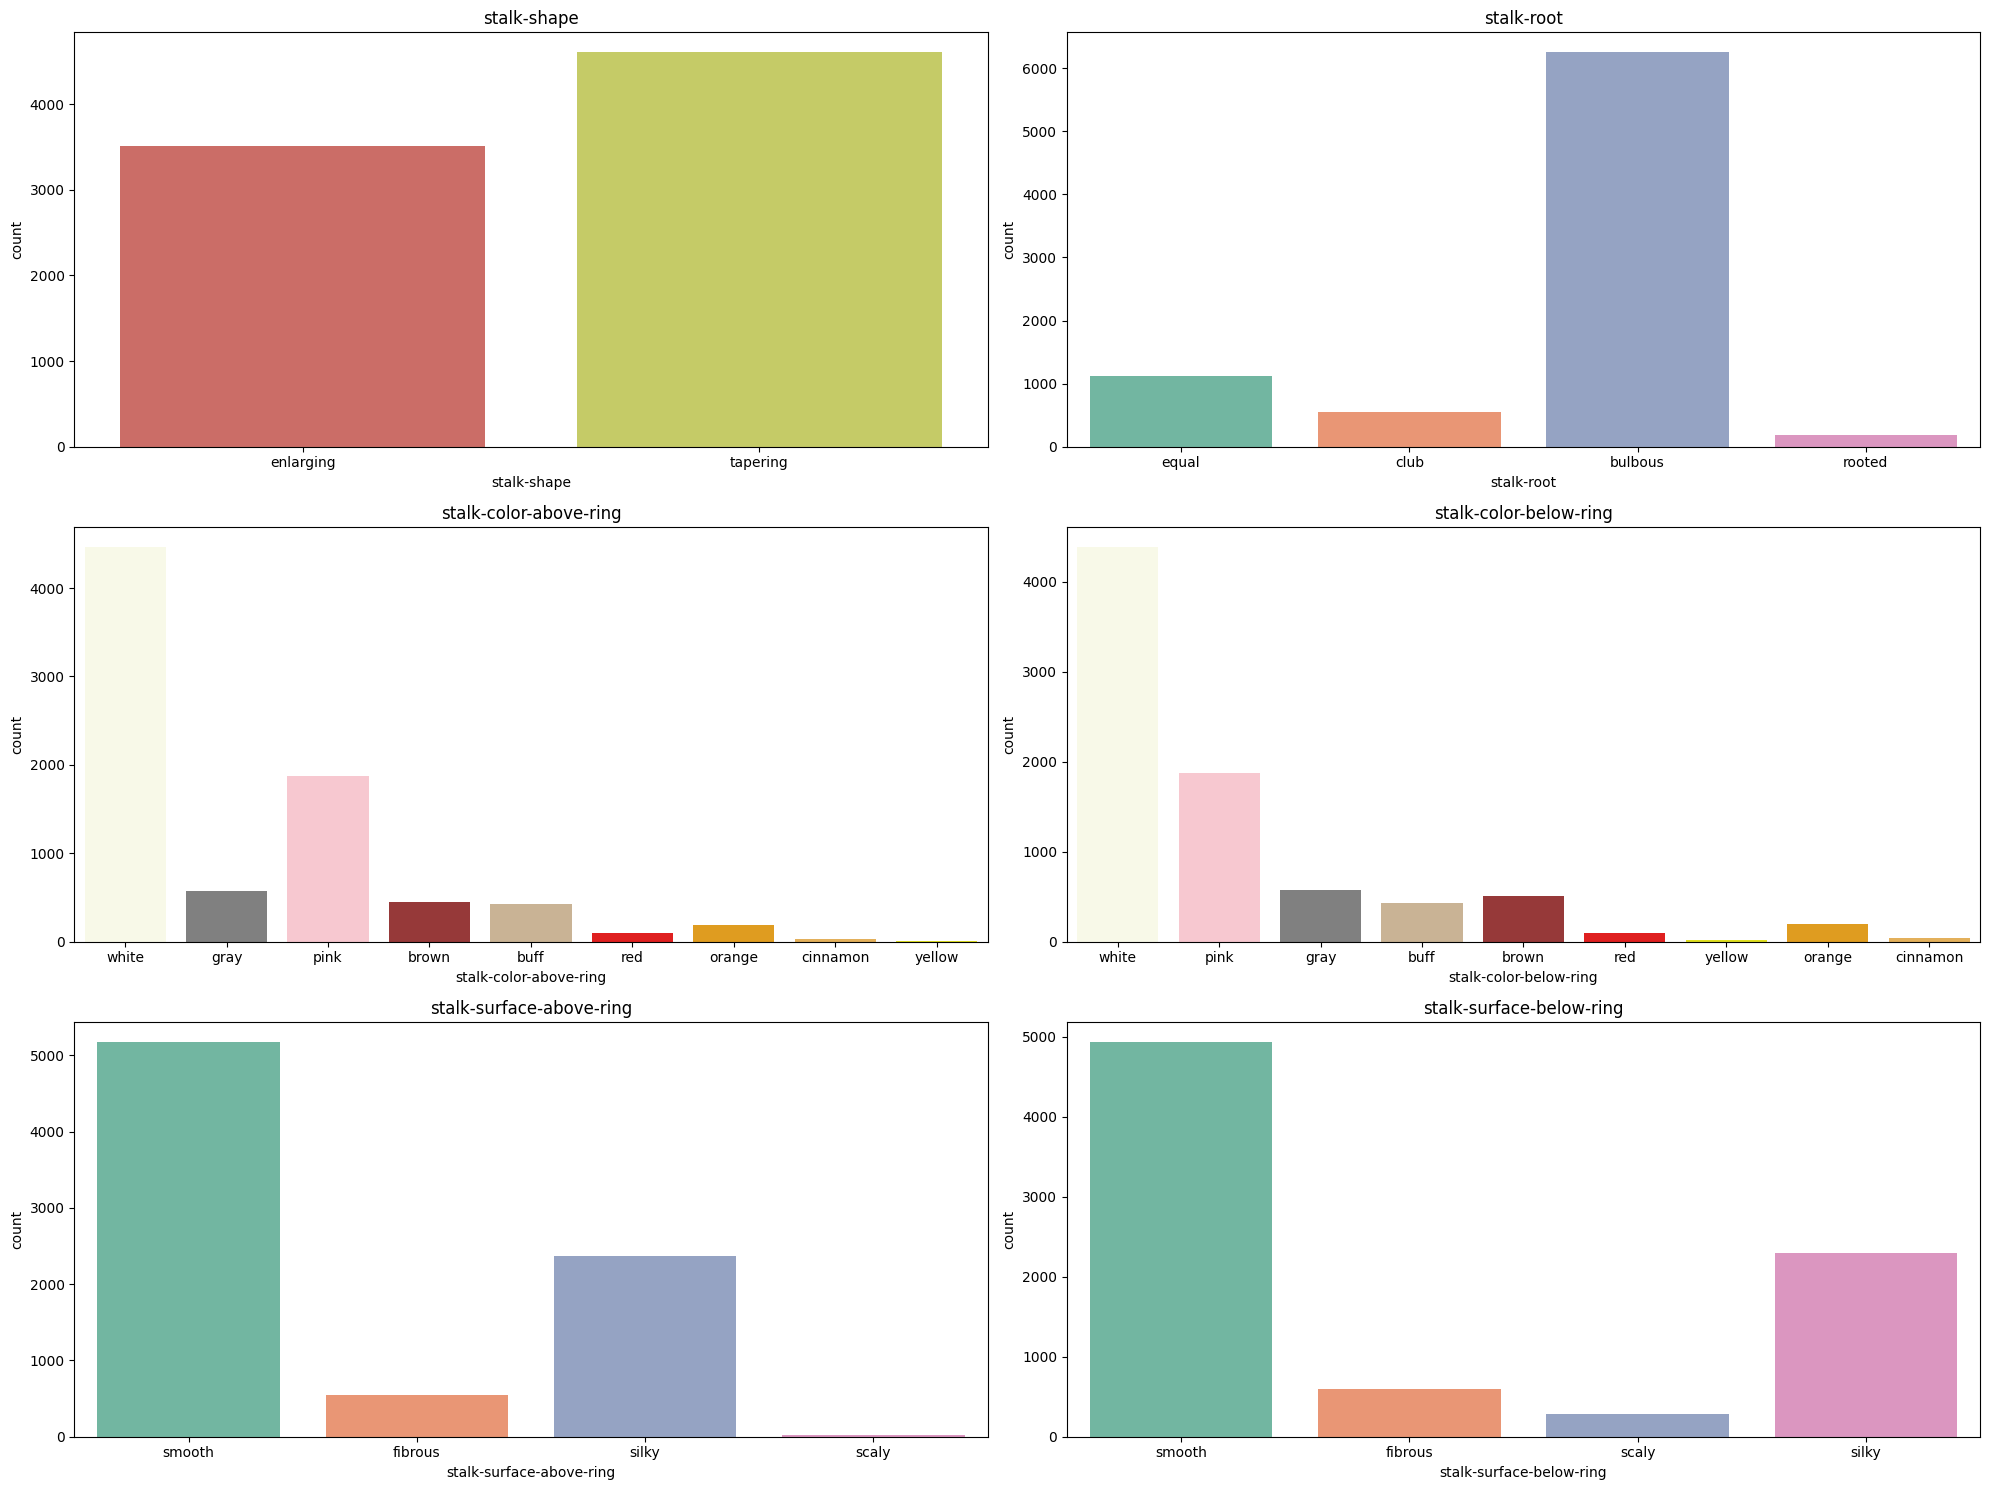

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # 2 row, 2 columns
pal =sns.color_palette("hls")
pal2 =sns.color_palette("Set2")
pal3 =sns.color_palette("Paired")
# Plot Value1 in the first subplot
sns.countplot(data=df, x='stalk-shape',palette=pal, ax=axes[0,0])
axes[0,0].set_title('stalk-shape')


sns.countplot(data=df, x='stalk-root',palette=pal2,  ax=axes[0,1])
axes[0,1].set_title('stalk-root')

colors = {'cinnamon': '#F9B545','orange':'orange', 'red': 'red','brown':'brown','pink':'pink','white':'#FBFCE5','green':'green','yellow':'yellow','pink':'pink','chocolate':'chocolate','buff':'tan','gray':'gray','purple':'purple'}
sns.countplot(data=df, x='stalk-color-above-ring',palette=colors,ax=axes[1,0])
axes[1,0].set_title('stalk-color-above-ring')

colors = {'cinnamon': '#F9B545','orange':'orange', 'red': 'red','brown':'brown','pink':'pink','white':'#FBFCE5','green':'green','yellow':'yellow','pink':'pink','chocolate':'chocolate','buff':'tan','gray':'gray','purple':'purple'}
sns.countplot(data=df, x='stalk-color-below-ring',palette=colors,ax=axes[1,1])
axes[1,1].set_title('stalk-color-below-ring')

sns.countplot(data=df, x='stalk-surface-above-ring',palette=pal2,  ax=axes[2,0])
axes[2,0].set_title('stalk-surface-above-ring')

sns.countplot(data=df, x='stalk-surface-below-ring',palette=pal2,  ax=axes[2,1])
axes[2,1].set_title('stalk-surface-below-ring')



plt.tight_layout()


plt.show()

Making subplots for cap related categories to check class distributions amongst cap columns

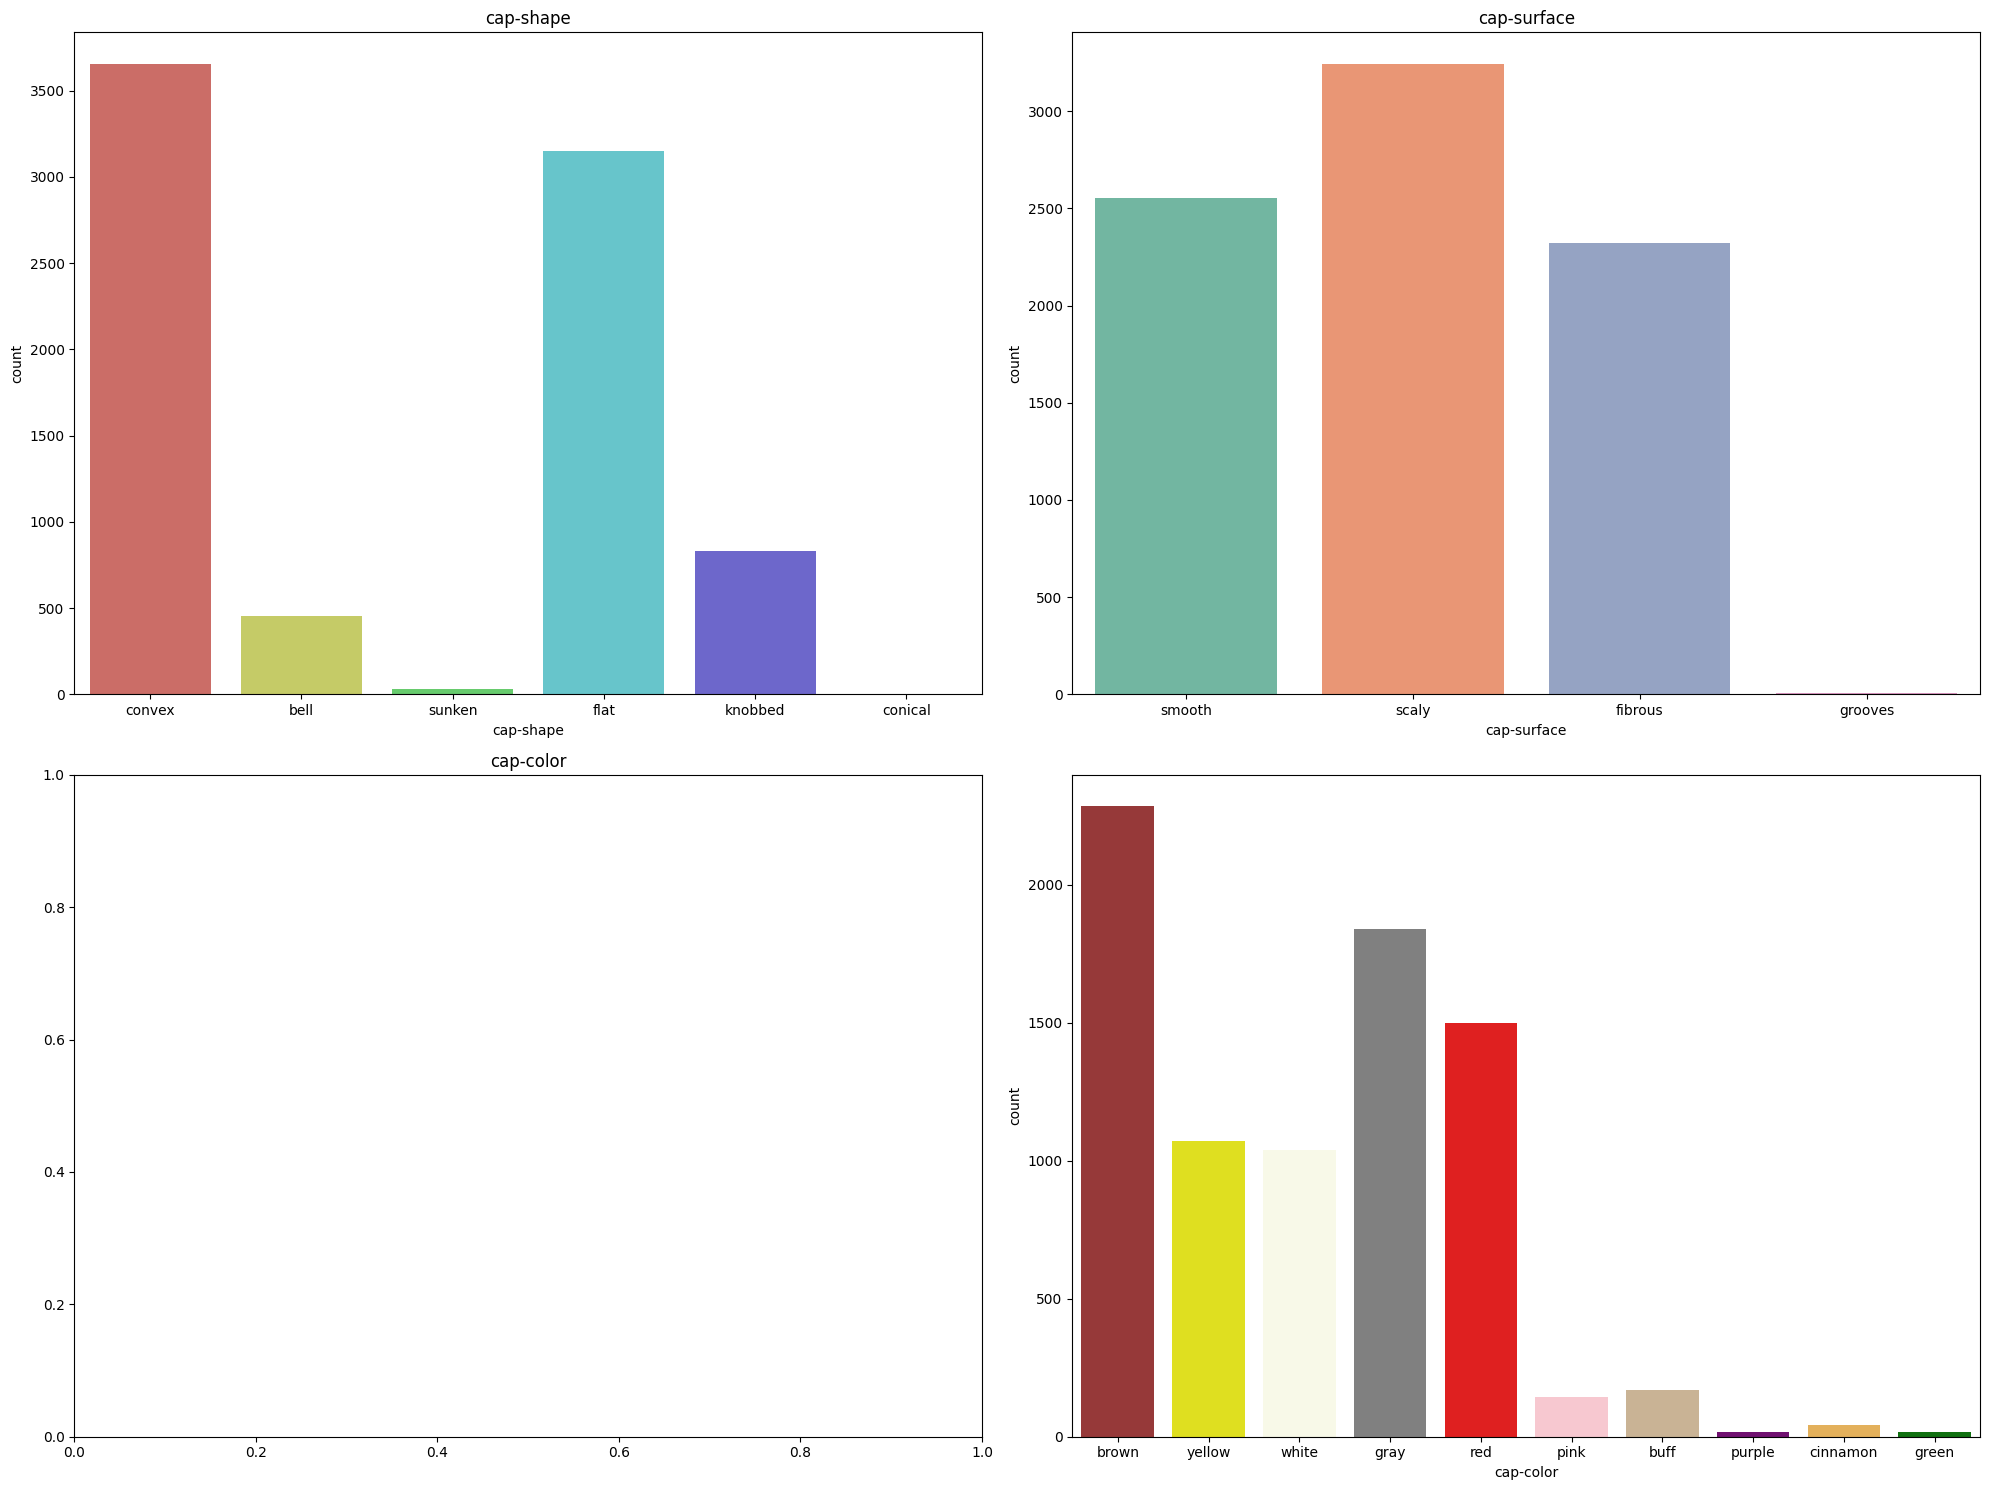

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))  # 2 row, 2 columns
pal =sns.color_palette("hls")
pal2 =sns.color_palette("Set2")
pal3 =sns.color_palette("Paired")
# Plot Value1 in the first subplot
sns.countplot(data=df, x='cap-shape',palette=pal, ax=axes[0,0])
axes[0,0].set_title('cap-shape')


sns.countplot(data=df, x='cap-surface',palette=pal2,  ax=axes[0,1])
axes[0,1].set_title('cap-surface')

colors = {'cinnamon': '#F9B545', 'red': 'red','brown':'brown','pink':'pink','white':'#FBFCE5','green':'green','yellow':'yellow','pink':'pink','chocolate':'chocolate','buff':'tan','gray':'gray','purple':'purple'}
sns.countplot(data=df, x='cap-color',palette=colors,ax=axes[1,1])
axes[1,0].set_title('cap-color')


plt.tight_layout()


plt.show()

Making subplots for gill related categories to check class distributions amongst gill columns

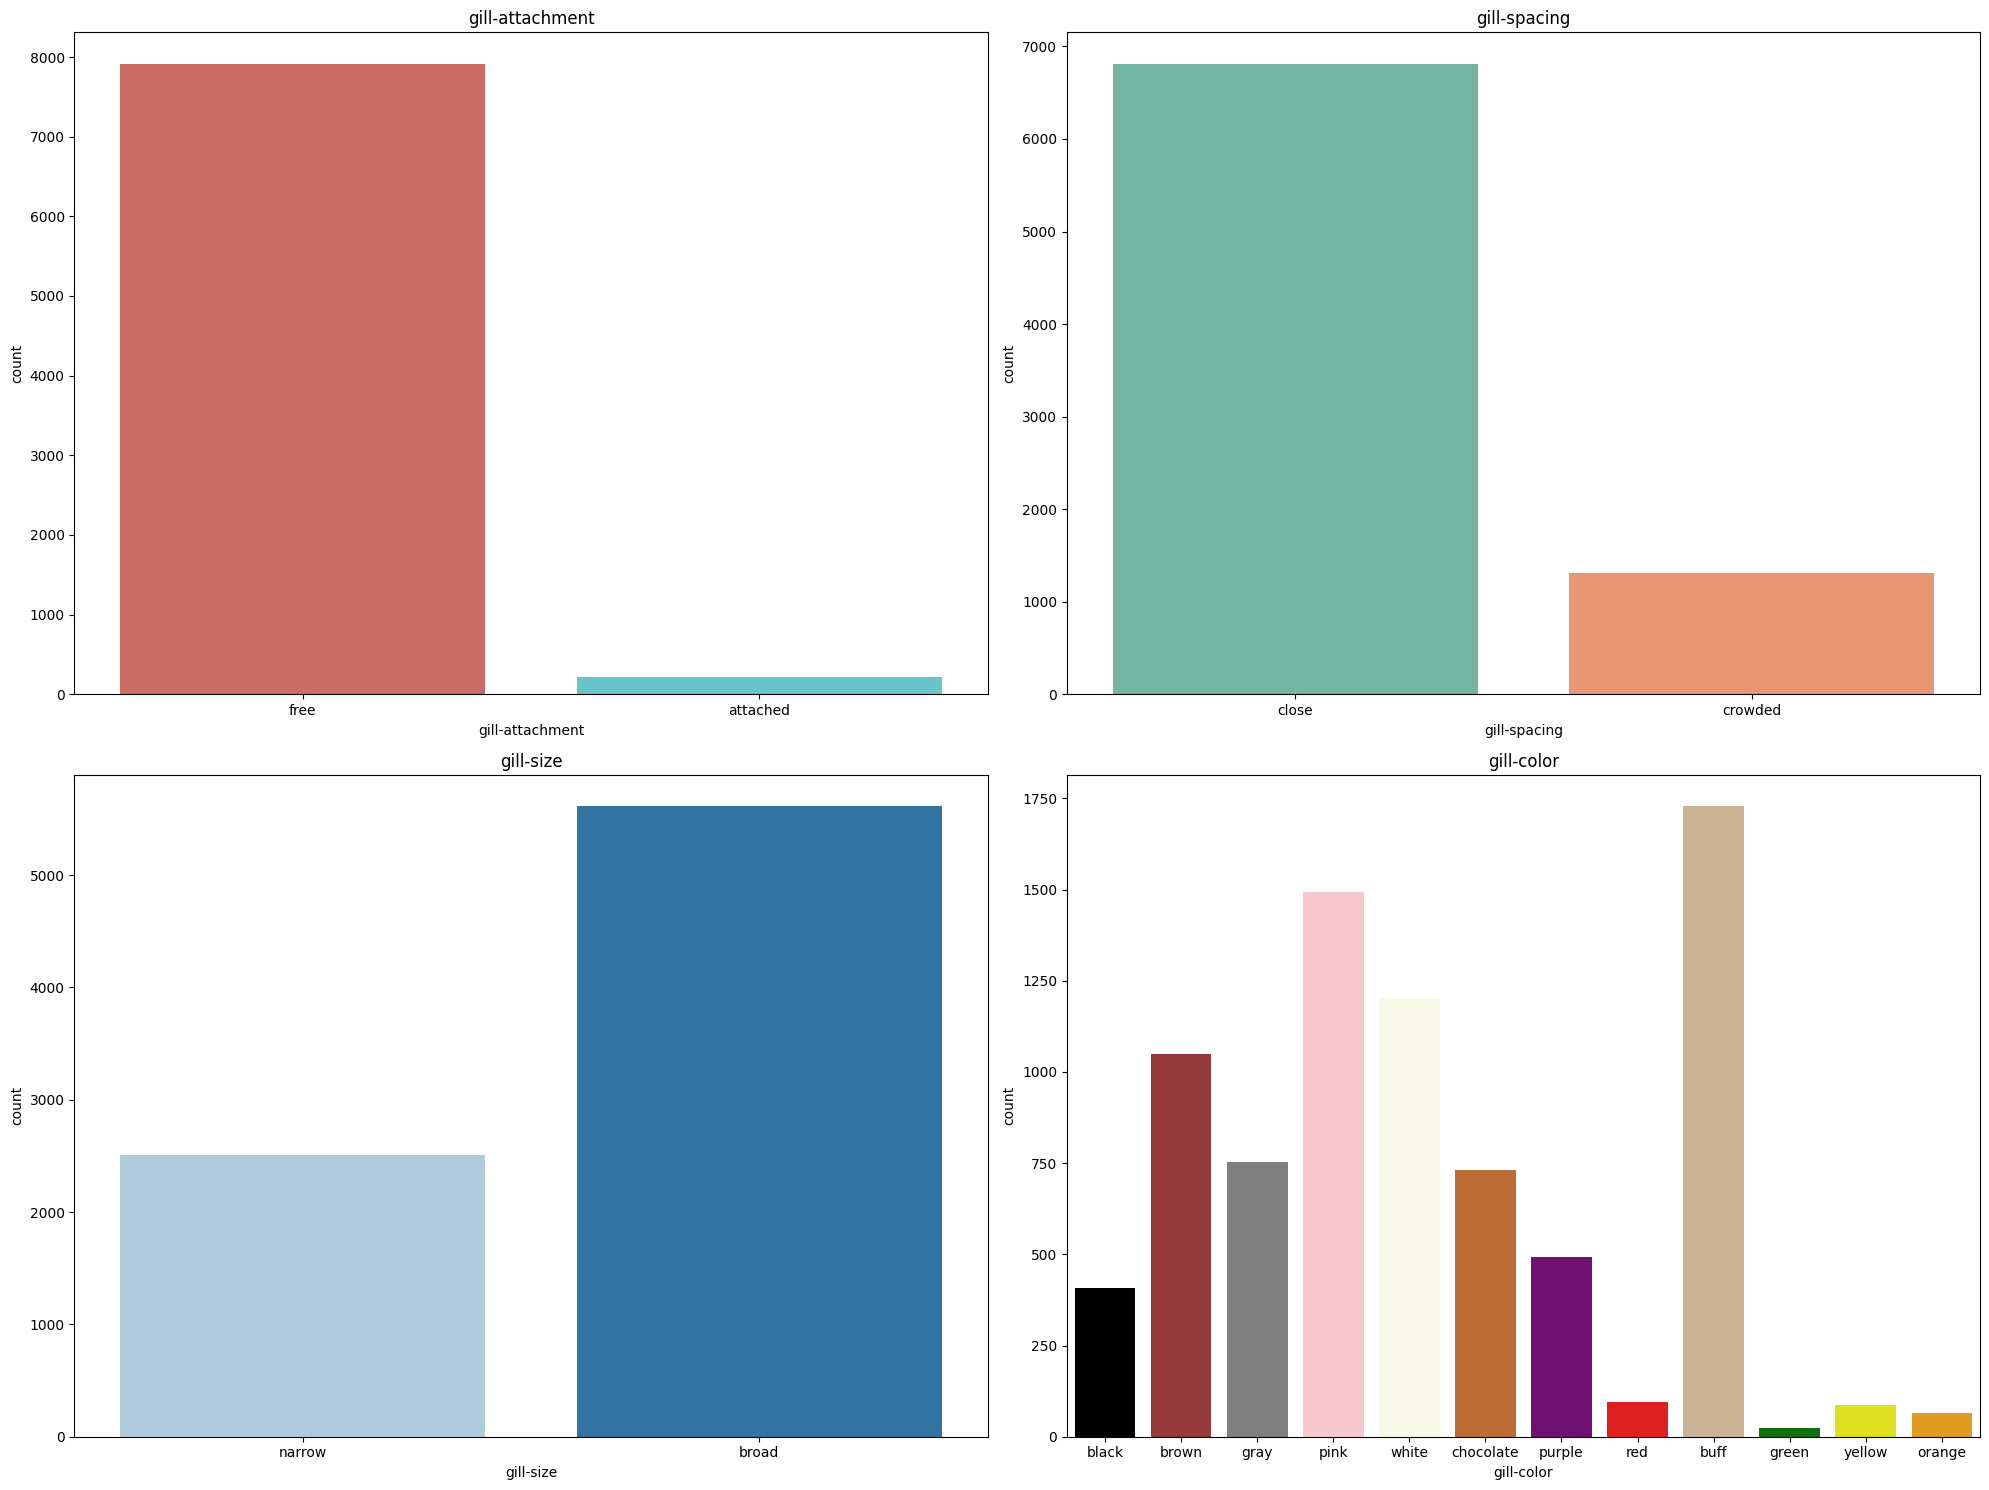

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))  # 2 row, 2 columns
pal =sns.color_palette("hls", 2)
pal2 =sns.color_palette("Set2")
pal3 =sns.color_palette("Paired")
# Plot Value1 in the first subplot
sns.countplot(data=df, x='gill-attachment',palette=pal, ax=axes[0,0])
axes[0,0].set_title('gill-attachment')


sns.countplot(data=df, x='gill-spacing',palette=pal2,  ax=axes[0,1])
axes[0,1].set_title('gill-spacing')

sns.countplot(data=df, x='gill-size',palette=pal3, ax=axes[1,0])
axes[1,0].set_title('gill-size')
colors = {'black': 'black', 'red': 'red','brown':'brown','pink':'pink','white':'#FBFCE5','green':'green','yellow':'yellow','orange':'orange','pink':'pink','chocolate':'chocolate','buff':'tan','gray':'gray','purple':'purple'}
sns.countplot(data=df, x='gill-color',palette=colors,ax=axes[1,1])
axes[1,1].set_title('gill-color')


plt.tight_layout()


plt.show()

Now we create some grouped/stacked bar charts to compare the non-body characteristics of the mushrooms with whether they are poisonous or edible to view their relationships

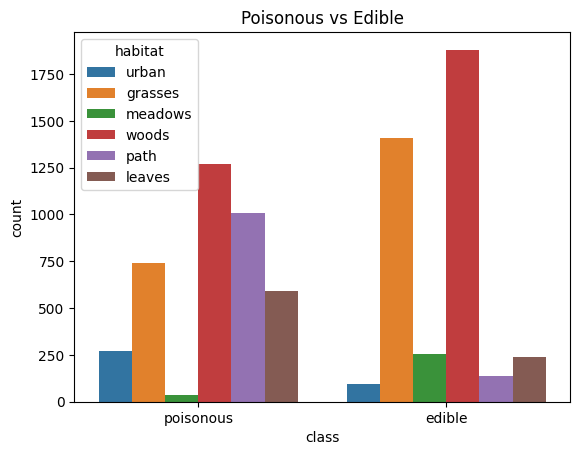

In [59]:
# Plotting a stacked bar chart to see the habitat make up of poisonous and edible mushrooms.
colors = {'edible': 'green', 'poisonous': 'red'}
sns.countplot(data=df, x='class',hue='habitat')

plt.title('Poisonous vs Edible')

plt.show()

From the above stacked bar chart, we can see that the poisonous mushrooms have more varied habitats, being able to stay at multiple habitats with a relatively large population for each one. Edible mushrooms mostly grow in the grasses and woods. From the analysis, we can tell that fewer edible mushrooms grow in areas that are not grasses or woods and that poisonous mushrooms generally grow everywhere except meadows.

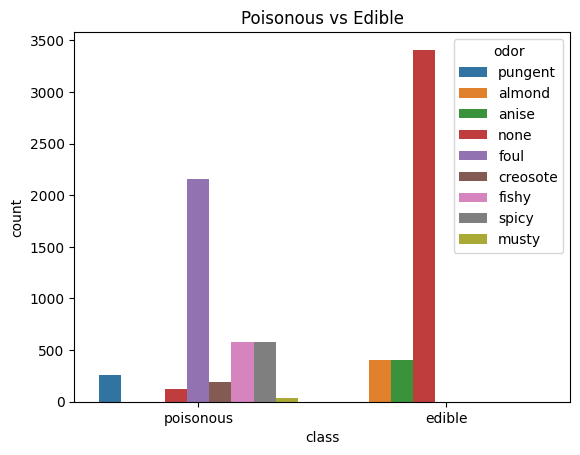

In [60]:
# Plotting a stacked bar chart to see the odor make up of poisonous and edible mushrooms.

sns.countplot(data=df, x='class',hue='odor')

plt.title('Poisonous vs Edible')

plt.show()

From the above analysis, we can see that smell is very distinct between edible and poisonous mushrooms. None of the smells overlap, meaning that certain odors are specifically related to edible and poisonous mushrooms.We can see that odorless,anise and almond odors belong to edible mushrooms while the rest of the odors belong to mushrooms that are poisonous.